In [1]:
'''
This notebook implements a batch run for OFAT analysis
Packages
'''
from model import *
import csv
from mesa.batchrunner import BatchRunner
import pandas as pd
import numpy as np
import tqdm as tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import time
from SALib.sample import saltelli
from SALib.analyze import sobol
from itertools import combinations
from joblib import Parallel, delayed, cpu_count

### Experiment: Income Policy

In [2]:
'''
Experiment: Income policy
'''

def with_income_policy(max_steps, ):
    model_s = HousingMarket(income_policy = True)
    model_s.run_model(max_steps)
    data = model_s.datacollector.get_model_vars_dataframe()
    return data['Gini'].iloc[-1]

def without_income_policy(max_steps, ):
    model_s = HousingMarket(income_policy = False)
    model_s.run_model(max_steps)
    data = model_s.datacollector.get_model_vars_dataframe()
    return data['Gini'].iloc[-1]

max_steps = 10_000
n = 30

with_income_policy_list = Parallel(n_jobs = 16)(delayed(with_income_policy)(max_steps)for i in range(n))
without_income_policy_list = Parallel(n_jobs = 16)(delayed(without_income_policy)(max_steps)for i in range(n))

In [3]:
print(with_income_policy_list)
print(without_income_policy_list)

[0.7677725054917475, 0.8000101010253033, 0.7422505107740724, 0.7922838214343999, 0.7314894903472973, 0.7278459084695955, 0.7342841577035668, 0.8125096167559562, 0.8073392183896752, 0.766184355520184, 0.748368957580238, 0.7786790923736768, 0.8153006701185451, 0.783322246758207, 0.7695305460977862, 0.7513457121380199, 0.7865077014814823, 0.7131035585817834, 0.7170925246206764, 0.7447858663221172, 0.813519360405276, 0.7260777122948381, 0.7549402725128307, 0.739186042405763, 0.7562552968347555, 0.7644193876492947, 0.7514471321903748, 0.7075303975803321, 0.773922134631351, 0.8012347774069037]
[0.76823853151876, 0.819053592163041, 0.7126527330591316, 0.7445544059581527, 0.7356307300703921, 0.7859865275208732, 0.7396142247311797, 0.8242202894440532, 0.7934705055120788, 0.7853868479139923, 0.7445085029157817, 0.738220204818602, 0.7477696610000902, 0.7651023665652926, 0.7831742000154138, 0.8020411883954199, 0.7143615127185501, 0.7757322258167456, 0.7502261551947201, 0.7315843782575823, 0.701111

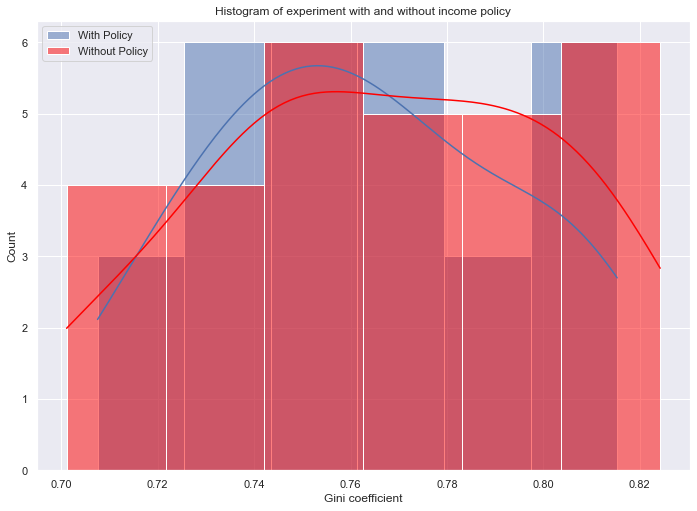

In [5]:
'''
Plots
'''
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(with_income_policy_list, kde = True, label = 'With Policy')
sns.histplot(without_income_policy_list, kde = True, color='red', label = 'Without Policy')
plt.xlabel('Gini coefficient')
plt.legend()
plt.title('Histogram of experiment with and without income policy')
plt.show()

In [6]:
'''
T-test
'''
ttest = scipy.stats.ttest_ind(without_income_policy_list, with_income_policy_list)

print(f'With policy: Mean = {np.mean(with_income_policy_list)}, SD = {np.std(with_income_policy_list)}')
print(f'No policy: Mean = {np.mean(without_income_policy_list)}, SD = {np.std(without_income_policy_list)}')
print(f'T = {ttest[0]}, p = {ttest[1]}')

With policy: Mean = 0.762617969196535, SD = 0.03099014402334894
No policy: Mean = 0.7664974311494142, SD = 0.03530522459794021
T = 0.4447175761191729, p = 0.6581790349949759


### Experiment: 20 year old policy

In [2]:
'''
Experiment: Age policy
'''

def f_with_age_policy(max_steps, ):
    model_s = HousingMarket(income_policy = True)
    model_s.run_model(max_steps)
    data = model_s.datacollector.get_model_vars_dataframe()
    return data['Gini'].iloc[-1]

def f_without_age_policy(max_steps, ):
    model_s = HousingMarket(income_policy = False)
    model_s.run_model(max_steps)
    data = model_s.datacollector.get_model_vars_dataframe()
    return data['Gini'].iloc[-1]

max_steps = 10_000
n = 30

with_age_policy = Parallel(n_jobs = 16)(delayed(f_with_age_policy)(max_steps)for i in range(n))
without_age_policy = Parallel(n_jobs = 16)(delayed(f_without_age_policy)(max_steps)for i in range(n))

In [8]:
with_age_policy = [0.7723186829992628, 0.7042219523377173, 0.7840818329173235, 0.7173594257582954, 0.8353679060400881, 0.7423662683329469, 0.7519990367789071, 0.7276736123226323, 0.7714116117184051, 0.7594179568548255, 0.7572058069539757, 0.7310170032510328, 0.8655604993894584, 0.7929330117012915, 0.7391781851543158, 0.7601896724962385, 0.7717535643583113, 0.8174920180829336, 0.7967985299084344, 0.7134188878424235, 0.6868498167778423, 0.8090118371295695, 0.7778994540778794, 0.696254536165096, 0.7414689498561436, 0.7807950442626842, 0.801397365128823, 0.7901196423167152, 0.7277720195260342, 0.7682283284820964]
without_age_policy = [0.7356245648078052, 0.7798994661307403, 0.8159868059992672, 0.8482114618945987, 0.788431428974355, 0.7579152891632165, 0.7757528105569644, 0.7783625123713352, 0.7719789513610772, 0.7644494864299131, 0.8648829739208053, 0.7584750076470564, 0.7173459607783638, 0.8141445591715881, 0.8389997290498483, 0.8413659924677364, 0.8140599314243231, 0.7571970854476235, 0.758558410020768, 0.8154915469885987, 0.7802083819246504, 0.8204626715991699, 0.7536888314680773, 0.7580405087965207, 0.7784570161132864, 0.704196338713847, 0.7999847284473642, 0.8257163995981138, 0.7963253082302326, 0.7763861187527216]

In [3]:
print(with_age_policy)
print(without_age_policy)

[0.7723186829992628, 0.7042219523377173, 0.7840818329173235, 0.7173594257582954, 0.8353679060400881, 0.7423662683329469, 0.7519990367789071, 0.7276736123226323, 0.7714116117184051, 0.7594179568548255, 0.7572058069539757, 0.7310170032510328, 0.8655604993894584, 0.7929330117012915, 0.7391781851543158, 0.7601896724962385, 0.7717535643583113, 0.8174920180829336, 0.7967985299084344, 0.7134188878424235, 0.6868498167778423, 0.8090118371295695, 0.7778994540778794, 0.696254536165096, 0.7414689498561436, 0.7807950442626842, 0.801397365128823, 0.7901196423167152, 0.7277720195260342, 0.7682283284820964]
[0.7356245648078052, 0.7798994661307403, 0.8159868059992672, 0.8482114618945987, 0.788431428974355, 0.7579152891632165, 0.7757528105569644, 0.7783625123713352, 0.7719789513610772, 0.7644494864299131, 0.8648829739208053, 0.7584750076470564, 0.7173459607783638, 0.8141445591715881, 0.8389997290498483, 0.8413659924677364, 0.8140599314243231, 0.7571970854476235, 0.758558410020768, 0.8154915469885987, 0.

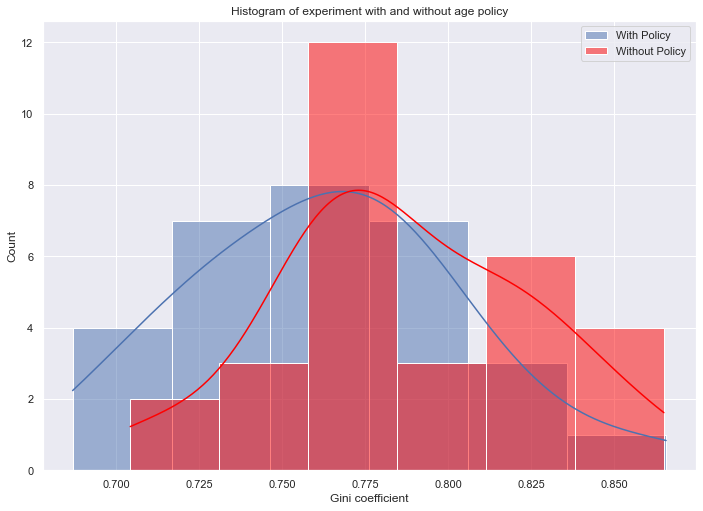

In [4]:
'''
Plots
'''
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(with_age_policy, kde = True, label = 'With Policy')
sns.histplot(without_age_policy, kde = True, color='red', label = 'Without Policy')
plt.legend()
plt.xlabel('Gini coefficient')
plt.title('Histogram of experiment with and without age policy')
plt.show()

In [9]:
'''
T-test
'''
ttest = scipy.stats.ttest_ind(with_age_policy, without_age_policy)

print(f'With policy: Mean = {np.mean(with_age_policy)}, SD = {np.std(with_age_policy)}')
print(f'Without policy: Mean = {np.mean(without_age_policy)}, SD = {np.std(without_age_policy)}')
print(f'T = {ttest[0]}, p = {ttest[1]}')

With policy: Mean = 0.7630520819640568, SD = 0.040714043651434675
Without policy: Mean = 0.7863533426083323, SD = 0.03756199868749675
T = -2.2652322074029767, p = 0.0272492479870237
